Christhofer Laurent Juliant

1301190379

IF - 43 - 03

# **Import Library Python**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import math
import copy
import random as r
from math import sqrt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# **Download File CSV**

### Kendaraan_Test

In [ ]:
!gdown --id 1OecPcjsVnz_y8yStXT3yYUKdvAMINmEn

Downloading...
From: https://drive.google.com/uc?id=1OecPcjsVnz_y8yStXT3yYUKdvAMINmEn
To: /content/kendaraan_test.csv
100% 2.31M/2.31M [00:00<00:00, 72.5MB/s]


### Kendaraan_Train

In [ ]:
!gdown --id 1xyrhw_fE-aeJ3Vf_45bBnucUhujCJ1L6

Downloading...
From: https://drive.google.com/uc?id=1xyrhw_fE-aeJ3Vf_45bBnucUhujCJ1L6
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 93.1MB/s]


# **Pengolahan Data**

### Dataset Kendaraan_test

In [ ]:
DatasetKendaraan_test = pd.read_csv('kendaraan_test.csv')
DatasetKendaraan_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


### Dataset Kendaraan_train

In [ ]:
DatasetKendaraan_train = pd.read_csv('kendaraan_train.csv')
DatasetKendaraan_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


### Gabungan Dataset

In [ ]:
GabungDataset =  pd.concat([DatasetKendaraan_test,DatasetKendaraan_train])
GabungDataset

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,id
0,Wanita,49.0,1.0,8.0,0.0,1-2 Tahun,Pernah,46963.0,26.0,145.0,0,NaN
1,Pria,22.0,1.0,47.0,1.0,< 1 Tahun,Tidak,39624.0,152.0,241.0,0,NaN
2,Pria,24.0,1.0,28.0,1.0,< 1 Tahun,Tidak,110479.0,152.0,62.0,0,NaN
3,Pria,46.0,1.0,8.0,1.0,1-2 Tahun,Tidak,36266.0,124.0,34.0,0,NaN
4,Pria,35.0,1.0,23.0,0.0,1-2 Tahun,Pernah,26963.0,152.0,229.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0,285827.0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0,285828.0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0,285829.0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0,285830.0


# **Eksplorasi Data**

### Lihat Dimensi

In [ ]:
GabungDataset.shape

(333470, 12)

In [ ]:
GabungDataset.dtypes

Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
id                   float64
dtype: object

In [ ]:
GabungDataset.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,id
count,319256.000000,319066.000000,319164.000000,319241.000000,318901.000000,319171.000000,319478.000000,333470.000000,285831.000000
mean,38.840028,0.997859,26.394380,0.458603,30550.097899,112.045299,154.310350,0.122551,142916.000000
std,15.526398,0.046217,13.246852,0.498284,17192.548724,54.196470,83.686932,0.327921,82512.446734
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,1.000000
25%,25.000000,1.000000,15.000000,0.000000,24397.000000,29.000000,82.000000,0.000000,71458.500000
50%,36.000000,1.000000,28.000000,0.000000,31660.000000,133.000000,154.000000,0.000000,142916.000000
75%,49.000000,1.000000,35.000000,1.000000,39392.000000,152.000000,227.000000,0.000000,214373.500000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000,285831.000000


### NULL Value

In [ ]:
GabungDataset.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
id                   47639
dtype: int64

In [ ]:
GabungDataset = GabungDataset.dropna()
GabungDataset.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
id                   0
dtype: int64

### Korelasi

### Heatmap

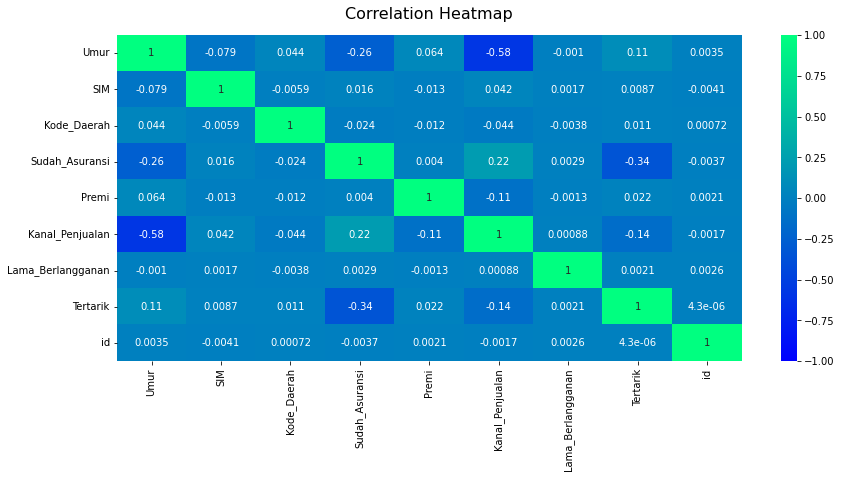

In [ ]:
plt.subplots(figsize=(14,6))
heatmap = sns.heatmap(GabungDataset.corr(), annot=True, vmin=-1, vmax=1, cmap='winter')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)
plt.show()

### Histogram

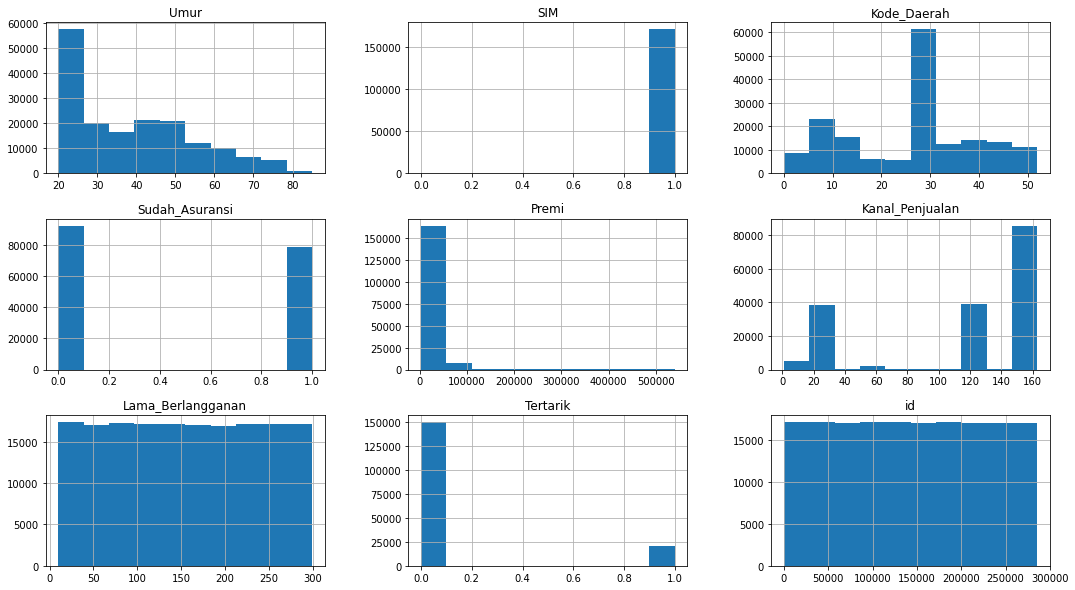

In [ ]:
GabungDataset.hist(layout=(3,3), figsize=(18,10))
plt.show()

### BoxPlot

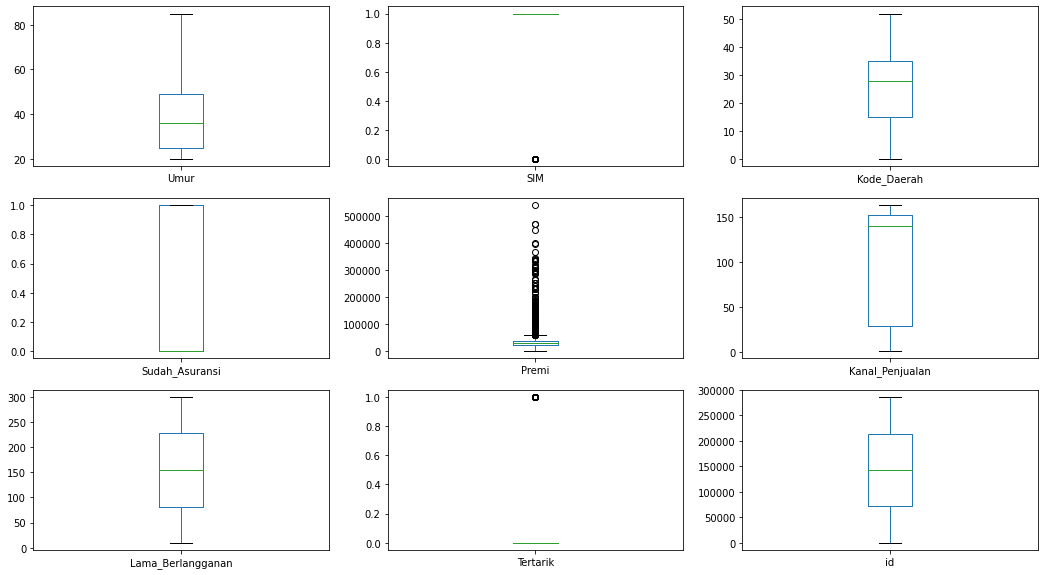

In [ ]:
GabungDataset.plot(kind="box", subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(18,10))
plt.show()

### Encoder

In [ ]:
encoder = LabelEncoder()

GabungDataset['Jenis_Kelamin'] = encoder.fit_transform(GabungDataset['Jenis_Kelamin'])
GabungDataset['Umur_Kendaraan'] = encoder.fit_transform(GabungDataset['Umur_Kendaraan'])
GabungDataset['Kendaraan_Rusak'] = encoder.fit_transform(GabungDataset['Kendaraan_Rusak'])

#normalisasi ConcatDataset

scalling = MinMaxScaler()
GabungDataset[['Premi']] = scalling.fit_transform(GabungDataset[['Premi']])

GabungDataset.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,id
0,1,30.0,1.0,33.0,1.0,1,1,0.047251,152.0,97.0,0,1.0
1,0,48.0,1.0,39.0,0.0,2,0,0.043104,29.0,158.0,0,2.0
3,1,58.0,1.0,48.0,0.0,0,1,0.000000,124.0,63.0,0,4.0
5,0,21.0,1.0,35.0,1.0,1,1,0.037402,152.0,171.0,0,6.0
8,1,20.0,1.0,8.0,1.0,1,1,0.052380,160.0,31.0,0,9.0
10,0,25.0,1.0,14.0,1.0,1,1,0.058753,152.0,282.0,0,11.0
14,0,66.0,1.0,24.0,1.0,0,1,0.066946,145.0,281.0,0,15.0
15,0,31.0,1.0,8.0,0.0,1,0,0.000000,152.0,132.0,0,16.0
16,1,24.0,1.0,30.0,1.0,1,1,0.045867,152.0,215.0,0,17.0
17,1,22.0,1.0,15.0,0.0,1,0,0.066338,152.0,225.0,0,18.0


### Pemilihan Fitur

In [ ]:
def corelation(GabungDataset, treshold):

    corr = GabungDataset.corr().abs()
    keep = []
    for i in range(len(corr.iloc[:,0])):
        above = corr.iloc[:i,i]
        if len(keep) > 0: above = above[keep]
        if len(above[above < treshold]) == len(above):
            keep.append(corr.columns.values[i])

    return GabungDataset[keep]

In [ ]:
select_feature = corelation(GabungDataset, 0.5)
select_feature

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Lama_Berlangganan,Tertarik,id
0,1,30.0,1.0,33.0,1.0,0.047251,97.0,0,1.0
1,0,48.0,1.0,39.0,0.0,0.043104,158.0,0,2.0
3,1,58.0,1.0,48.0,0.0,0.000000,63.0,0,4.0
5,0,21.0,1.0,35.0,1.0,0.037402,171.0,0,6.0
8,1,20.0,1.0,8.0,1.0,0.052380,31.0,0,9.0
...,...,...,...,...,...,...,...,...,...
285826,1,23.0,1.0,4.0,1.0,0.043454,217.0,0,285827.0
285827,1,21.0,1.0,46.0,1.0,0.078239,50.0,0,285828.0
285828,1,23.0,1.0,50.0,1.0,0.087661,226.0,0,285829.0
285829,0,68.0,1.0,7.0,1.0,0.051853,270.0,0,285830.0


In [ ]:
def VarianceTraceholdSelector(data, tracehold=0.5):
  selector=VarianceTracehold(tracehold)

### Scaling Dataset

In [ ]:
Scalling = MinMaxScaler()
hasil = Scalling.fit_transform(GabungDataset)
GabungDataset.loc[:,:]=hasil
GabungDataset.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,id
0,1.0,0.153846,1.0,0.634615,1.0,0.5,1.0,0.047251,0.932099,0.301038,0.0,0.000000
1,0.0,0.430769,1.0,0.750000,0.0,1.0,0.0,0.043104,0.172840,0.512111,0.0,0.000003
3,1.0,0.584615,1.0,0.923077,0.0,0.0,1.0,0.000000,0.759259,0.183391,0.0,0.000010
5,0.0,0.015385,1.0,0.673077,1.0,0.5,1.0,0.037402,0.932099,0.557093,0.0,0.000017
8,1.0,0.000000,1.0,0.153846,1.0,0.5,1.0,0.052380,0.981481,0.072664,0.0,0.000028


# **CLUSTERING**

### Eucliean

In [ ]:
#menghitung jarak antar 2 titik
def euclidean(centroid, data):
  centroidx = centroid[0]
  centroidy = centroid[1]

  datax = data[0]
  datay = data[1]

  jarak = sqrt((centroidx - datax)**2 + (centroidy - datay)**2)
  return jarak

### KMeans

In [ ]:
def kmeans(GabungDataset, k):
  data_cluster = GabungDataset.copy()
  #membuat kolom baru dengan nama cluster
  data_cluster['Cluster'] = ""
  data_cluster['Jarak'] = ""
  #memilih random objek dari himpunan sebagai centroid awal
  data_dari_centroid = []
  for i in range(k):
    data_dari_centroid.append(GabungDataset.iloc[np.random.randint(0, 30000)])
  #perulangan selama posisi centroid masih berbeda
  for x in range(2):
    x=0
    #untuk setiap data, hitung jarak data ke setiap centroid, lalu masukkan ke cluster
    for y in range(len(GabungDataset)):
      temp = data_dari_centroid.copy()
      indeks = 0
      jrk = euclidean(GabungDataset.iloc[y], data_dari_centroid[0])
      for k in range(len(data_dari_centroid) - 1):
        if jrk > euclidean(GabungDataset.iloc[y], data_dari_centroid[k+1]):
          indeks = k + 1
          jrk = euclidean(GabungDataset.iloc[y], data_dari_centroid[k+1])
          data_cluster.loc[y, 'Jarak'] = euclidean(GabungDataset.iloc[y], data_dari_centroid[k+1])
          data_cluster.loc[y, 'Cluster'] = 'Cluster' + str(k+2)
        else : 
          data_cluster.loc[y, 'Jarak'] = jrk
          data_cluster.loc[y, 'Cluster'] = 'Cluster' + str(indeks+1)

      #memindahkan posisi centroid (perbarui centroid dengan menghitung rata-rata semua objek yang ada didalam cluster tersebut)
      i = 0
      while i < (len(data_dari_centroid)):
        cluster_n = data_cluster.loc[data_cluster['Cluster'] == 'Cluster' + str(i+1)]
        data_dari_centroid[i] = cluster_n[:len(data_cluster.columns)].mean()
        i += 1
        data_dari_centroid = data_dari_centroid

    #pengecekan posisi centroid
    status = false 
    for i in range(len(data_dari_centroid)):
      for j in range(len(data_dari_centroid[i])):
        if data_dari_centroid[i][j] == temp[i][j]:
          status = status
        elif data_dari_centroid[i][j] != temp[i][j]:
          status = True
          break

      if status == False:
        break

    return(data_cluster) 


In [ ]:
#sse
def evaluasi(dataset):
  hasil = dataset.pow(2).sum()
  return hasil

# **Eksperimen**

In [ ]:
nilai_sse=[]
nilai_k=[]

### Eksperimen 1, Membuat Clustering dengan k=2

In [ ]:
nilai_k.append(2)
Gab = GabungDataset[['Kode_Daerah', 'Premi']]
cluster_2_titik_centroid = kmeans(Gab, 2)
sse2 = evaluasi(cluster_2_titik_centroid['Jarak'])
nilai_sse.append(sse2)

KeyboardInterrupt: ignored